In [75]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

Part 1:

In [76]:
silly_survey = pd.read_csv('silly-survey-v2.csv')
#print(silly_survey)
silly_survey = silly_survey.drop(columns='Timestamp')
#print(silly_survey)
silly_survey = silly_survey.rename(columns={'Favorite color of provided': 'color', 'Major': 'major', 'Favorite number (your choice)': 'chosen_num', 'Favorite number (from provided)': 'selected_num', "Oh no, this is new": 'new_col'})
#print(silly_survey)
silly_survey['major'] = silly_survey['major'].replace('Other', 'NON')
#print(silly_survey)
silly_survey['chosen_num'] = pd.to_numeric(silly_survey['chosen_num'], errors = 'coerce')
print('Cleaned dataset:')
silly_survey

Cleaned dataset:


,color,major,chosen_num,selected_num,new_col
0,Purple,CEG,42.0,42.00,NaN
1,Purple,CS,4.0,3.00,NaN
2,Blue,CS,13.0,3.00,NaN
3,Red,NON,NaN,3.14,NaN
4,Red,NON,NaN,3.14,NaN
5,Blue,CS,NaN,3.14,NaN
6,Red,ITC,35.0,42.00,NaN
7,Blue,CS,66.0,42.00,NaN
8,Blue,CS,NaN,42.00,NaN
9,Red,ITC,NaN,42.00,NaN


Part 2:

In [77]:
# 1: Mean "Favorite number (your choice)"

# get the mean of the "Favorite number (your choice)" column

mean_fav_num = silly_survey['chosen_num'].mean()

print('The mean of the "Favorite number (your choice)" column:')
print(mean_fav_num)

# 2: Mode "Favorite number (from provided)"

# get the mode of the "Favorite number (from provided) column"

mode_fav_num = silly_survey['selected_num'].mode()

print('The mode of the "Favorite number (from provided)" column:')
print(f"{mode_fav_num}")

# 3: How many users chose "CEG" as their major?

# Find how many rows in the survey data had "CEG" listed under 'major'

CEG_users = silly_survey.loc[silly_survey.major == 'CEG', 'major'].count()

print('The total number of users who chose "CEG" as their major:')
print(CEG_users)

# 4: Mean "Favorite number (from provided)" for users who chose "CS" as their major

# Obtain only the favorite numbers for the rows that have CS as the chosen major.

mean_CEG = silly_survey.loc[silly_survey.major == 'CS', 'selected_num'].mean()

print('The mean "Favorite number (from provided)" for users who chose "CS" as their major:')
print(mean_CEG)

# 5: How many users chose the number "42" from the selection of choices?

# Obtain only the rows that have 42 as the number selected from the choices

users_42 = silly_survey.loc[silly_survey.selected_num == 42, 'selected_num'].count()

print("Number of users who chose the number '42' from the selection of choices:")
print(users_42)

# 6: How many users chose the number "42" from the selection of choices and chose the major "CEG"?

# Check if row contains 42 as the 'selected_num' column value and if CEG is the 'major' column value
# https://www.geeksforgeeks.org/count-all-rows-or-those-that-satisfy-some-condition-in-pandas-dataframe/

ceg_42 = silly_survey.apply(lambda x : True
            if x['selected_num'] == 42 and x['major'] == 'CEG' else False, axis = 1)

# Grab only the rows where the condition checking evaluates to "True"

num_ceg_42 = len(ceg_42[ceg_42 == True].index)

print('Number of users who chose the number "42" from the selection of choices and chose the major "CEG":')
print(num_ceg_42)

The mean of the "Favorite number (your choice)" column:
45.30769230769231
The mode of the "Favorite number (from provided)" column:
0    42.0
dtype: float64
The total number of users who chose "CEG" as their major:
5
The mean "Favorite number (from provided)" for users who chose "CS" as their major:
11.614
Number of users who chose the number '42' from the selection of choices:
9
Number of users who chose the number "42" from the selection of choices and chose the major "CEG":
3


Part 3:

In [78]:
# Gather user input

input_major = input('Enter a major from these options: CS, CEG, ITC, or NON')
input_number = input('Enter a number from these options: 42, 3, 5, 3.14')
converted_number = int(input_number)

# Look for all the rows that match the user-specified conditions

major_query = silly_survey.loc[silly_survey.major == input_major, 'major'].count()
number_query = silly_survey.loc[silly_survey.selected_num == converted_number, 'selected_num'].count()
conditions = silly_survey.apply(lambda x : True if x['selected_num'] == converted_number and x['major'] == input_major else False, axis = 1)
query_stats = len(conditions[conditions == True].index)

# Return the results using the user's input

print(f'1. Number of users who chose {input_major}:')
print(major_query)

print(f'2. Number of users who chose {input_number}:')
print(number_query)

print(f'3. Number of users who chose both {input_major} and {input_number}')
print(query_stats)


1. Number of users who chose CEG:
5
2. Number of users who chose 42:
9
3. Number of users who chose both CEG and 42
3


Part 4:

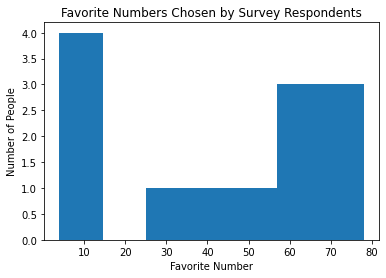

In [79]:
df = pd.DataFrame(silly_survey)
hist = silly_survey['chosen_num'].hist(bins=7, grid = False)
plt.xlabel('Favorite Number')
plt.ylabel('Number of People')
plt.title('Favorite Numbers Chosen by Survey Respondents')
plt.show()

Extra Credit:

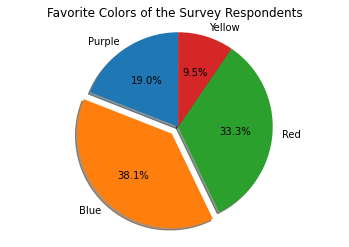

In [80]:
# Favorite Colors Pie Chart

colors = 'Purple', 'Blue', 'Red', 'Yellow'
qty = []
ct1 = silly_survey.loc[silly_survey.color == 'Purple', 'color'].count()
qty.append(ct1)
ct2 = silly_survey.loc[silly_survey.color == 'Blue', 'color'].count()
qty.append(ct2)
ct3 = silly_survey.loc[silly_survey.color == 'Red', 'color'].count()
qty.append(ct3)
ct4 = silly_survey.loc[silly_survey.color == 'Yellow', 'color'].count()
qty.append(ct4)
explode = (0, 0.1, 0, 0)


fig1, ax1 = plt.subplots()
ax1.pie(qty, explode=explode, labels=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Favorite Colors of the Survey Respondents')

plt.show()



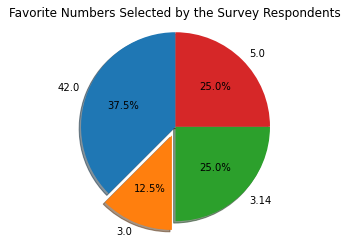

In [81]:
# Favorite number (from provided) pie chart

numbers = silly_survey['selected_num']
filtered_numbers = []
seen = []
for num in numbers:
        if num not in seen and pd.isnull(num) == False:
            filtered_numbers.append(num)
        seen.append(num)    
num_qty = []
n1 = silly_survey.loc[silly_survey.selected_num == 42, 'selected_num'].count()
num_qty.append(n1)
n2 = silly_survey.loc[silly_survey.selected_num == 3, 'selected_num'].count()
num_qty.append(n2)
n3 = silly_survey.loc[silly_survey.selected_num == 3.14, 'selected_num'].count()
num_qty.append(n3)
n4 = silly_survey.loc[silly_survey.selected_num == 5.0, 'selected_num'].count()
num_qty.append(n4)

explode = (0, 0.1, 0, 0)


fig1, ax1 = plt.subplots()
ax1.pie(num_qty, explode=explode, labels=filtered_numbers, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Favorite Numbers Selected by the Survey Respondents')

plt.show()
